CS589 ASSIGNMENT 2\
\
Name: Dorian Benhamou Goldfajn\
Email: dbenhamougol@umass.edu\
Discussed With: Aryan Nair

In [21]:
import pangolin as pg

Question 1

In [22]:
from scipy.stats import norm

In [23]:
x = [1, 2, 3, 4, 5, 6]
y = [0, 1.5, 1.0, 0.5, 1.2, 2.5]
slopes_values = [0, 0.25, 0.5, 0.75, 1]

def Probability_Y_Given_S(slope_value, x, y):
    y_equation = slope_value * x
    prob_y = norm.pdf(y, loc=y_equation, scale=1)
    return prob_y

probs_of_all_s = [1 for _ in range(len(slopes_values))]
for i, s in enumerate(slopes_values):
    for j in range(len(x)):
        cur_x, cur_y = x[j], y[j]
        prob_y_given_s = Probability_Y_Given_S(s, cur_x, cur_y)
        probs_of_all_s[i] *= prob_y_given_s

posterior = [.2 * p for p in probs_of_all_s]
sm = sum(posterior)
normal_posterior = [p / sm for p in posterior]
normal_posterior


[0.009456905156440607,
 0.7751024227873098,
 0.21523816927002018,
 0.00020250214073843964,
 6.454908376547967e-10]

Question 2

In [26]:
inputs = [1, 2, 3, 4, 5, 6]
outputs = [0, 1.5, 1.0, 0.5, 1.2, 2.5]

w = pg.categorical([.2,.2,.2,.2,.2])
s_values = pg.makerv([0, 0.25, 0.5, 0.75, 1])
s_floats = [0, 0.25, 0.5, 0.75, 1]
noise = pg.normal(0, 1)


y = [pg.normal(s_values[w] * x, 1) for x in inputs]



w_samples, n_samples = pg.sample((w, noise), y, outputs)
w_samples = [.25 * w for w in w_samples]

probs = [0 for i in range(len(s_values))]
for j, s in enumerate(w_samples):
    for i, sval in enumerate(s_floats):
        if s == sval:
            probs[i] += 1

probs = [p / len(w_samples) for p in probs]

posterior = [p * .2 for p in probs]

s = sum(posterior)
normal_posterior = [p / s for p in posterior]
normal_posterior


[0.011299999999999998, 0.7761, 0.2122, 0.00039999999999999996, 0.0]

Question 3

In [27]:
import matplotlib.pyplot as plt

(array([0.01415681, 0.01415681, 0.        , 0.05662723, 0.08494085,
        0.09909766, 0.11325447, 0.25482255, 0.19819532, 0.1698817 ,
        0.29729298, 0.36807702, 0.4954883 , 0.41054745, 0.4954883 ,
        0.58042915, 0.66537   , 0.53795872, 0.67952752, 1.04760272,
        0.99097764, 0.89187799, 1.21748681, 1.41567935, 1.68466198,
        1.79791278, 1.71297563, 1.93948071, 2.12352351, 1.95363751,
        2.50575774, 2.77473153, 2.59069868, 2.66147718, 3.11450114,
        2.93046244, 3.36931686, 3.56751197, 3.58166876, 3.49674275,
        3.41178724, 3.46841441, 3.94974539, 3.46842905, 3.48257121,
        4.1479405 , 3.79402066, 3.9356052 , 4.04884295, 3.7232367 ,
        3.36931686, 3.24191939, 3.04371061, 3.18527854, 3.08619401,
        2.94461305, 3.21359213, 2.32171414, 2.53407673, 1.99610789,
        2.4066549 , 1.9677943 , 2.01027316, 1.84038316, 1.5289337 ,
        1.14670028, 1.10423455, 1.21748424, 1.10422989, 1.25995462,
        0.94850517, 0.77862364, 0.60874726, 0.50

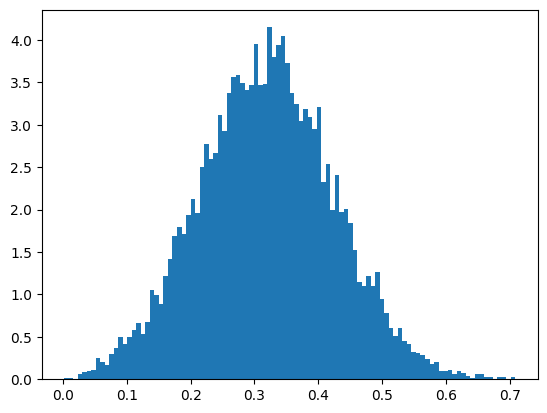

In [28]:
inputs = [1, 2, 3, 4, 5, 6]
outputs = [0, 1.5, 1.0, 0.5, 1.2, 2.5]


s = pg.uniform(0, 1)
s_floats = [i * .1 for i in range(0, 10)]
noise = pg.normal(0, 1)


y = [pg.normal(s * x, 1) for x in inputs]



s_samples, n_samples = pg.sample((s, noise), y, outputs)
plt.hist(s_samples, density=True, bins=100)



Question 4

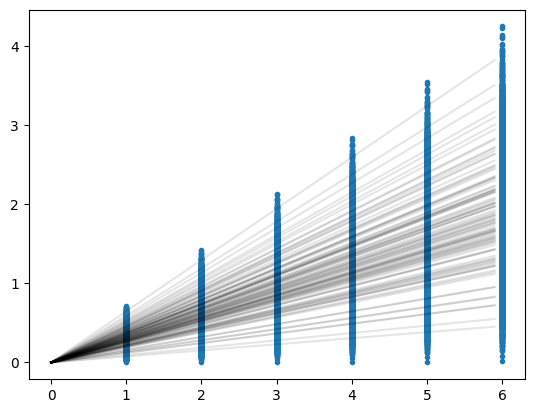

In [29]:
import numpy as np

x,y = [x for s in s_samples for x in inputs], [s * x for s in s_samples for x in inputs]

plt.plot(x,y,'.')
for s in s_samples[::100]:
    xs = np.arange(0,6,.1)
    plt.plot(xs, s*xs,'k-',alpha=0.1)

Question 5

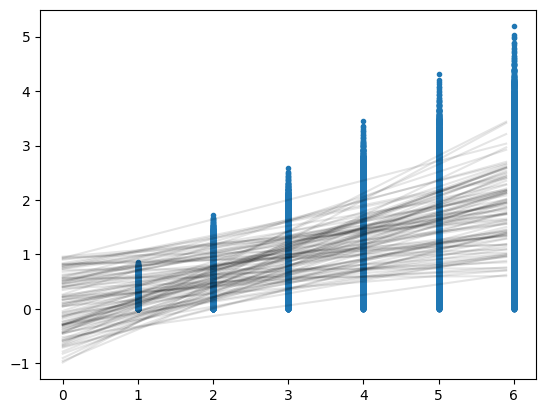

In [30]:
inputs = [1, 2, 3, 4, 5, 6]
outputs = [0, 1.5, 1.0, 0.5, 1.2, 2.5]


s = pg.uniform(0, 1)
s_floats = [0, 0.25, 0.5, 0.75, 1]
noise = pg.normal(0, 1)
bias = pg.uniform(-1,1)

y = [pg.normal(bias + s * x, 1) for x in inputs]



s_samples, n_samples, bias_samples = pg.sample((s, noise, bias), y, outputs)

probs = [0 for i in range(len(s_floats))]
for j, s in enumerate(s_samples):
    for i, sval in enumerate(s_floats):
        if s <= sval + .25 and s >= sval:
            probs[i] += 1

probs = [p / len(s_samples) for p in probs]

posterior = [p * .2 for p in probs]

s = sum(posterior)
normal_posterior = [p / s for p in posterior]
normal_posterior

x,y = [x for s in s_samples for x in inputs], [s * x for s in s_samples for x in inputs]
plt.plot(x,y,'.')
for (b, s) in zip(bias_samples[::100], s_samples[::100]):
    xs = np.arange(0,6,.1)
    plt.plot(xs, b + s*xs,'k-',alpha=0.1)


Question 6

In [31]:
import numpy as np
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
y = y - np.mean(y)
y = y / np.std(y)

X_train = X[1::2]
X_test = X[::2]
y_train = y[1::2]
y_test = y[::2]


num_train, num_features = X_train.shape
num_test = X_test.shape[0]

X_train = pg.makerv(X_train)


dist_y_train = pg.slot()
w = pg.slot()
with pg.Loop(num_features) as i:
    w[i] = pg.normal(0, 10)

with pg.Loop(len(X_train)) as j:
    x = X_train[j]
    dist_y_train[j] = pg.normal(w @ x, 1)

dist_y_test = [pg.normal(w @ X_test[i], 1) for i in range(len(X_test))]


e = pg.E(dist_y_test, dist_y_train, y_train)
print("mean: ", np.mean(e))
w_samples = pg.sample((dist_y_test), dist_y_train, [y for y in y_train], niter=100)



mean:  0.016898083


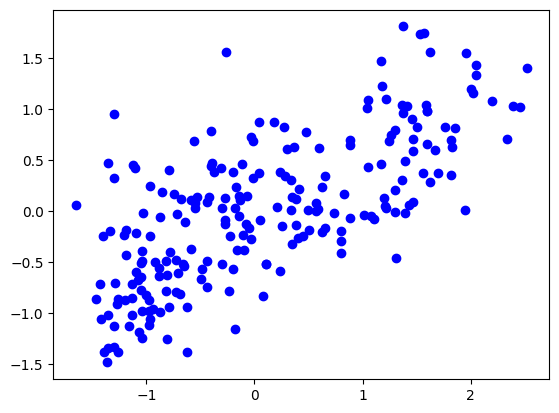

In [32]:
import matplotlib.pyplot as plt
X_test = np.array(X_test)
w_samples = np.array([np.median(row) for row in w_samples])
y_test = np.array(y_test)
plt.scatter(y_test, w_samples, color='blue')  

In [33]:
# calculate mean squared difference
sq_diff = (w_samples - y_test) ** 2
mean_sq_diff = np.mean(sq_diff)
mean_sq_diff

0.5697750148423903

Question 7

In [34]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True)

X_train = X[1::2]
X_test = X[::2]
y_train = y[1::2]
y_test = y[::2]

num_train, num_features = X_train.shape
num_test = X_test.shape[0]

X_train = pg.makerv(X_train)


w = pg.slot()
with pg.Loop(num_features) as i:
    w[i] = pg.normal(0, 10)

dist_y_train = pg.slot()
with pg.Loop(len(X_train)) as j:
    x = X_train[j]
    dist_y_train[j] = pg.bernoulli(pg.sigmoid(w @ x))


sigmoids = [pg.sigmoid(w @ X_test[i]) for i in range(len(X_test))]
bernoullis = [pg.bernoulli(sigmoids[i]) for i in range(len(sigmoids))]


e= pg.E(bernoullis, dist_y_train, y_train)
print("mean: ", np.mean(e))
zeroes = [expected_val for expected_val in e if expected_val == 0]
ones = [expected_val for expected_val in e if expected_val == 1]



mean:  0.6219765


(array([  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 100.00009537,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.

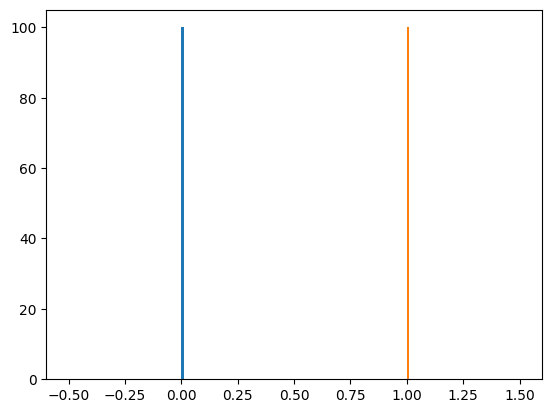

In [36]:
plt.hist(zeroes, density=True, bins=100)
plt.hist(ones, density=True, bins=100)